In [1]:
import pandas as pd
import statsmodels.formula.api as sm

In [2]:
import matplotlib.pyplot as plt

In [3]:
airq_asthma_df = pd.read_csv(r'C:/Users/Hevander/Desktop/DS4A/Data_Indoor/adult_asthma_uhf42.csv')
airq_asthma_df = airq_asthma_df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1','geo_type_name'])
airq_asthma_df = airq_asthma_df.drop(columns=['geography_id','indicator_name',
                                              'ed_annual_adult_estimated_age_adjusted_rate_per10k',
                                             'ed_annual_adult_number'])

airq_asthma_df['borough'] = airq_asthma_df['borough'].apply(lambda x: x.title())
airq_asthma_df['geography'] = airq_asthma_df['geography'].apply(lambda x: x.title())
airq_asthma_df = airq_asthma_df[airq_asthma_df['year'] >= 2010].reset_index(drop=True)


airq_asthma_df.rename(columns = {'ed_annual_adult_rate_per10k':'Annual_Adult_Rate_Per10k'}, inplace = True)
airq_asthma_df.rename(columns = {'borough':'Borough'}, inplace = True)
airq_asthma_df.rename(columns = {'year':'Year'}, inplace = True)
airq_asthma_df.rename(columns = {'geography':'Geography'}, inplace = True)
airq_asthma_df.head(5)

,Year,Borough,Geography,Annual_Adult_Rate_Per10k
0,2010,Queens,Bayside - Little Neck,18.0
1,2011,Queens,Bayside - Little Neck,17.5
2,2012,Queens,Bayside - Little Neck,21.4
3,2013,Queens,Bayside - Little Neck,18.8
4,2014,Queens,Bayside - Little Neck,19.6


In [4]:
indoorair_df = pd.read_csv(r'C:/Users/Hevander/Desktop/DS4A/Data_Indoor/listing_complaints.csv')
indoorair_df.rename(columns = {'UHF_42':'Geography'}, inplace = True)
indoorair_df.rename(columns = {'Incident_Address_Borough':'Borough'}, inplace = True)
indoorair_df.rename(columns = {'Date_Received':'Year'}, inplace = True)
indoorair_df = indoorair_df[indoorair_df["Year"] != 2015]
indoorair_df = indoorair_df.drop(columns=['Unnamed: 0'])
indoorair_df['Geography'] = indoorair_df['Geography'].apply(lambda x: x.title())
indoorair_df = indoorair_df[indoorair_df['Year'] <= 2016].reset_index(drop=True)
indoorair_df.head(30)

,Geography,Borough,Year,asbestos_count,gasses_count,ventilation_count,mold_count,dust_count,sewageO_count,sewageL_count
0,Bayside - Littleneck,Queens,2010,5.0,4.0,4.0,3.0,NaN,NaN,NaN
1,Bayside - Littleneck,Queens,2011,2.0,8.0,8.0,2.0,NaN,NaN,NaN
2,Bayside - Littleneck,Queens,2012,6.0,16.0,3.0,2.0,NaN,NaN,NaN
3,Bayside - Littleneck,Queens,2013,1.0,12.0,4.0,NaN,NaN,NaN,NaN
4,Bayside - Littleneck,Queens,2014,5.0,21.0,NaN,NaN,4.0,NaN,NaN
5,Bayside - Littleneck,Queens,2016,9.0,15.0,4.0,5.0,1.0,NaN,NaN
6,Bedford Stuyvesant - Crown Heights,Brooklyn,2010,15.0,50.0,24.0,3.0,7.0,NaN,NaN
7,Bedford Stuyvesant - Crown Heights,Brooklyn,2011,34.0,67.0,54.0,10.0,19.0,NaN,NaN
8,Bedford Stuyvesant - Crown Heights,Brooklyn,2012,27.0,69.0,34.0,12.0,35.0,NaN,NaN
9,Bedford Stuyvesant - Crown Heights,Brooklyn,2013,25.0,100.0,40.0,8.0,42.0,NaN,NaN


In [5]:
indoorair_df.shape

(261, 10)

In [6]:
test = pd.merge(indoorair_df, airq_asthma_df,left_index=True, right_index=True, how="inner", on=["Year","Geography","Borough"])
test.head(5)

,Geography,Borough,Year,asbestos_count,gasses_count,ventilation_count,mold_count,dust_count,sewageO_count,sewageL_count,Annual_Adult_Rate_Per10k
0,Bayside - Littleneck,Queens,2010,5.0,4.0,4.0,3.0,NaN,NaN,NaN,18.0
1,Bayside - Littleneck,Queens,2011,2.0,8.0,8.0,2.0,NaN,NaN,NaN,17.5
2,Bayside - Littleneck,Queens,2012,6.0,16.0,3.0,2.0,NaN,NaN,NaN,21.4
3,Bayside - Littleneck,Queens,2013,1.0,12.0,4.0,NaN,NaN,NaN,NaN,18.8
4,Bayside - Littleneck,Queens,2014,5.0,21.0,NaN,NaN,4.0,NaN,NaN,19.6


In [7]:
test.dtypes

Geography                    object
Borough                      object
Year                          int64
asbestos_count              float64
gasses_count                float64
ventilation_count           float64
mold_count                  float64
dust_count                  float64
sewageO_count               float64
sewageL_count               float64
Annual_Adult_Rate_Per10k    float64
dtype: object

In [8]:
indoorair_df['Year'] = indoorair_df['Year'].astype(int)

In [ ]:
test.to_csv('./complaints_asthma_rates')

In [9]:
complaint_nan = test['sewageO_count'].notnull().values.any()
complaint_sum = test['sewageO_count'].notnull().sum()
print(complaint_nan, complaint_sum)

False 0


In [10]:
descriptor_nan = test['sewageL_count'].notnull().values.any()
descriptor_sum = test['sewageL_count'].notnull().sum()
print(descriptor_nan, descriptor_sum)

False 0


In [11]:
import pandas as pd
import statsmodels.formula.api as sm


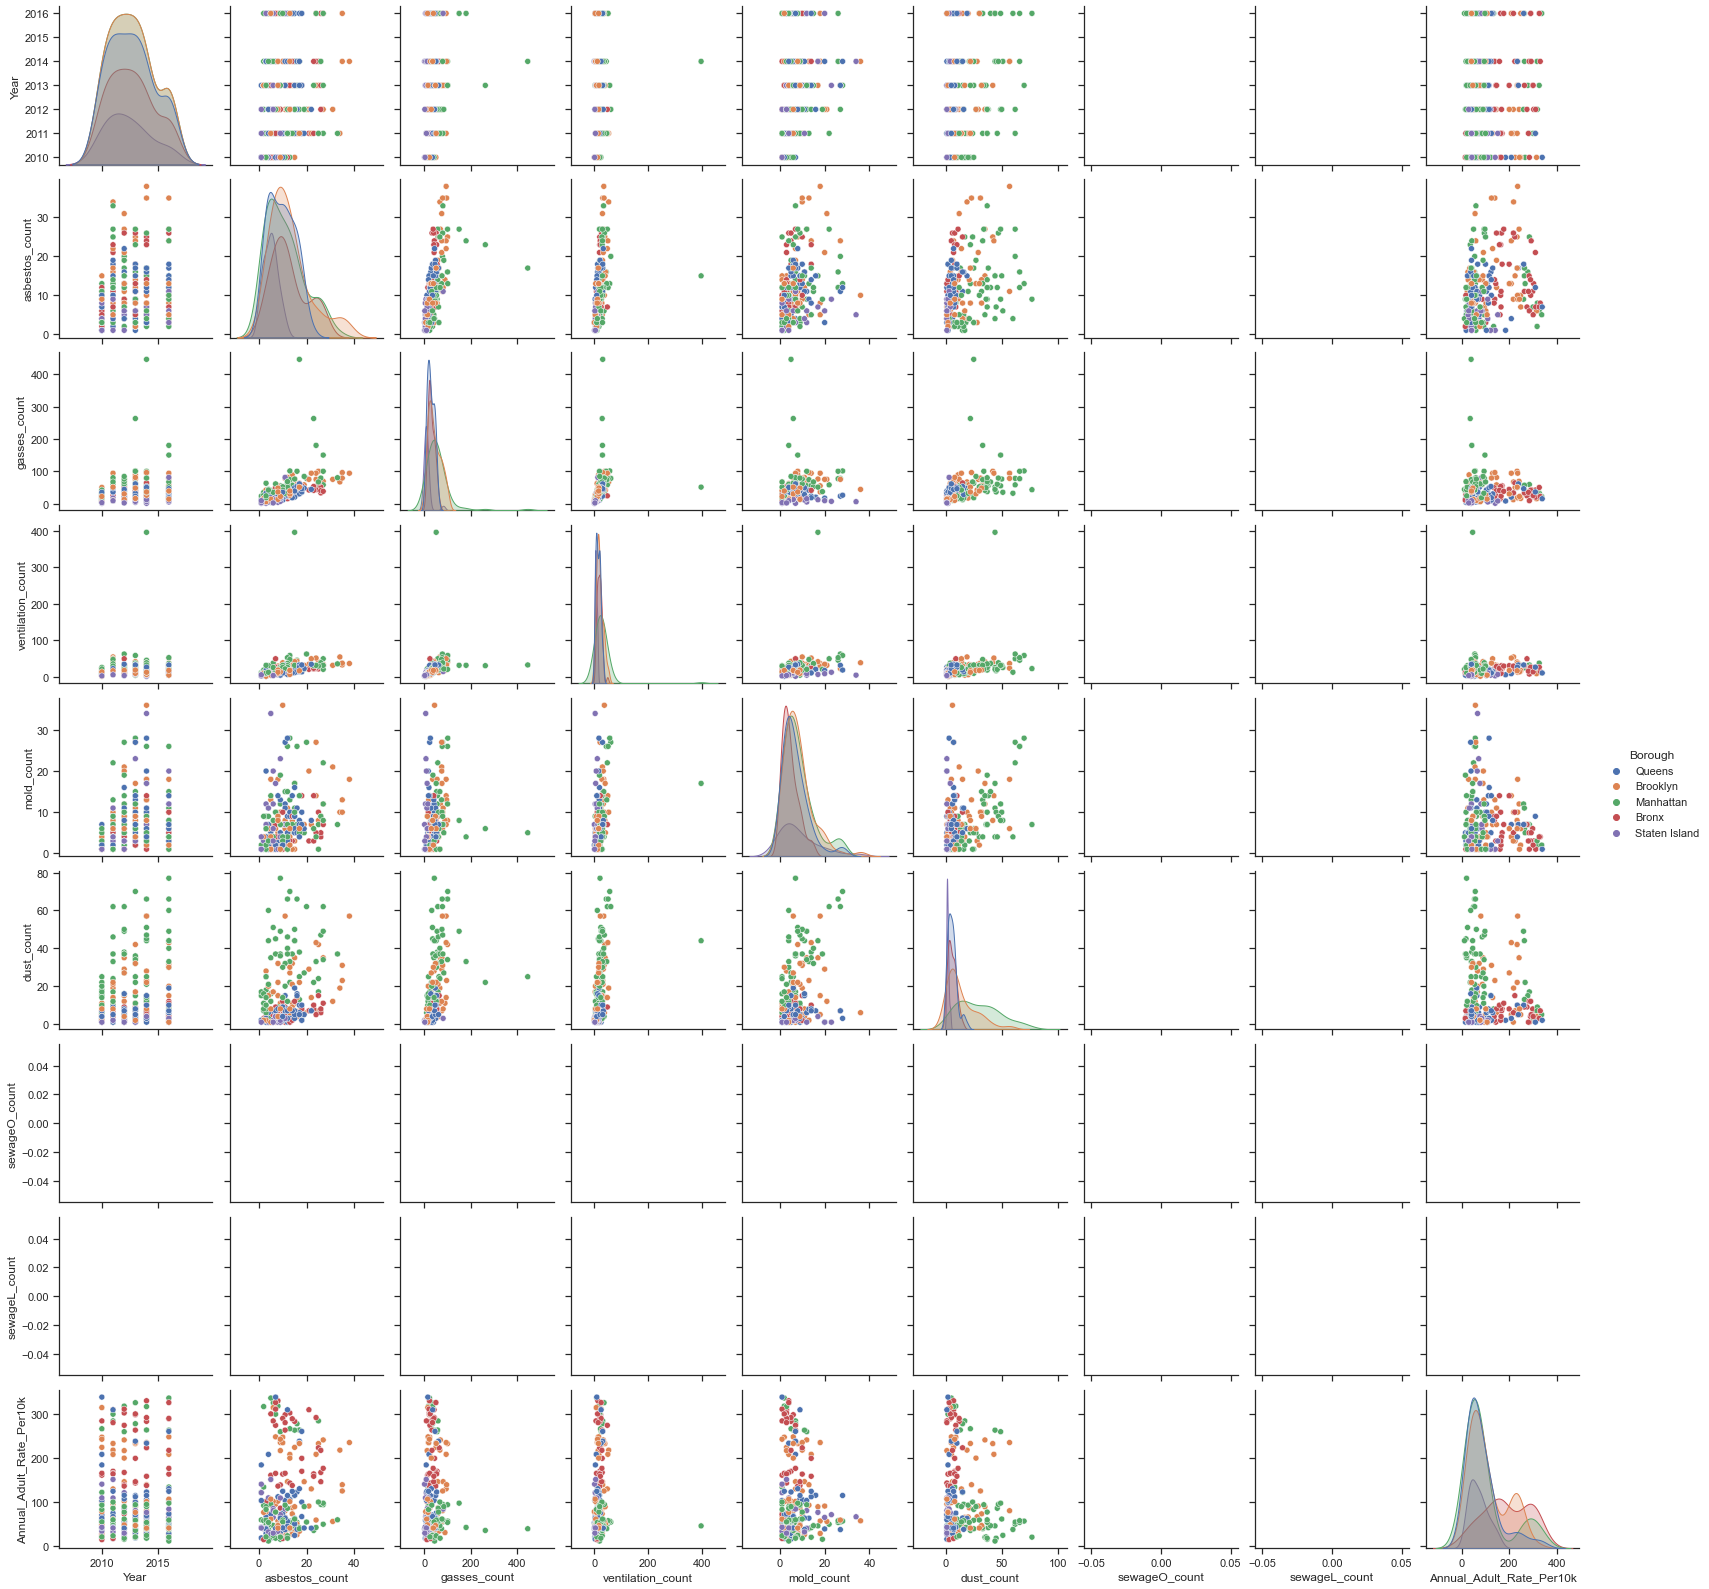

In [12]:
import seaborn as sns
sns.set_theme(style="ticks")

complaints_asthma_plots = sns.pairplot(test, hue="Borough")

In [13]:
test = test.drop(columns = ['sewageO_count','sewageL_count'])

In [14]:
test = test.drop(columns = ['Year'])

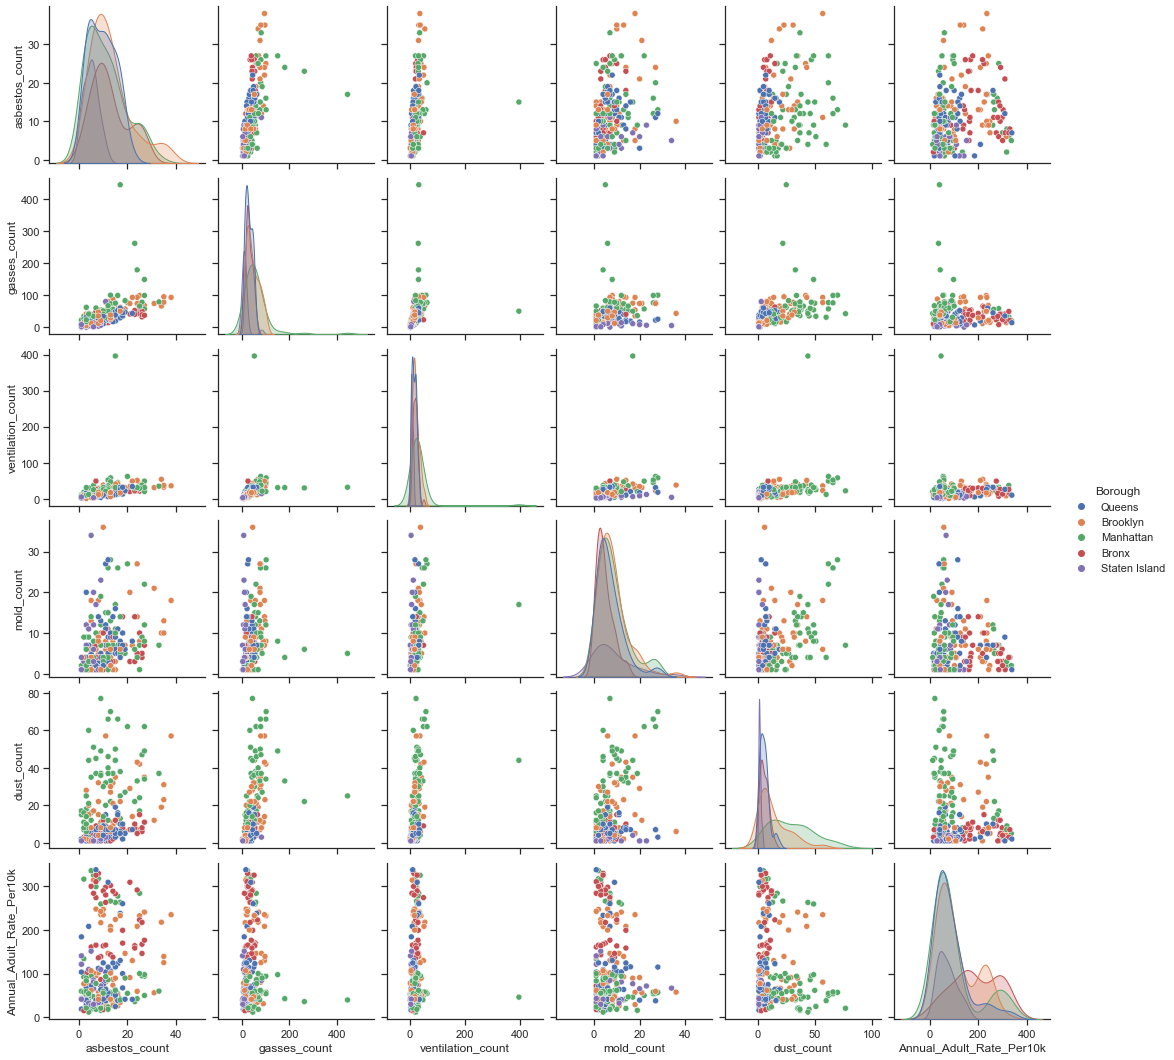

In [15]:
sns.set_theme(style="ticks")

complaints_asthma_plots = sns.pairplot(test, hue="Borough")

In [16]:
from scipy import stats
import statsmodels.formula.api as smf

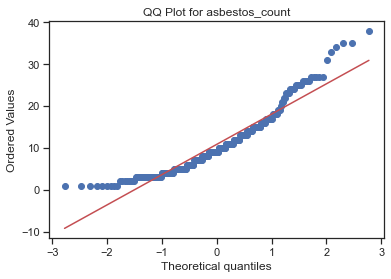

In [17]:
stats.probplot(x=test['asbestos_count'], dist="norm", plot=plt)
plt.title("QQ Plot for asbestos_count")
plt.show()

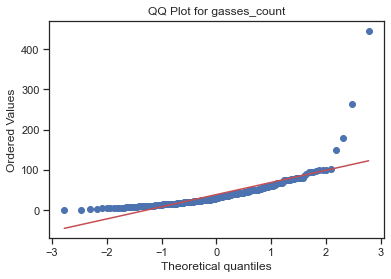

In [18]:
stats.probplot(x=test['gasses_count'], dist="norm", plot=plt)
plt.title("QQ Plot for gasses_count")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


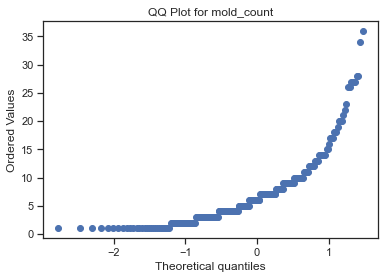

In [19]:
stats.probplot(x=test['mold_count'], dist="norm", plot=plt)
plt.title("QQ Plot for mold_count")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


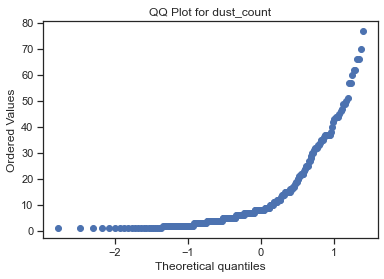

In [20]:
stats.probplot(x=test['dust_count'], dist="norm", plot=plt)
plt.title("QQ Plot for dust_count")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


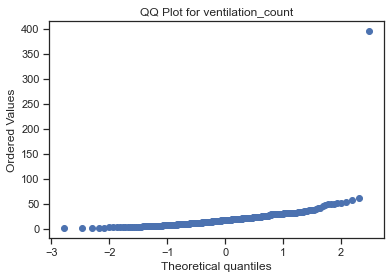

In [21]:
stats.probplot(x=test['ventilation_count'], dist="norm", plot=plt)
plt.title("QQ Plot for ventilation_count")
plt.show()

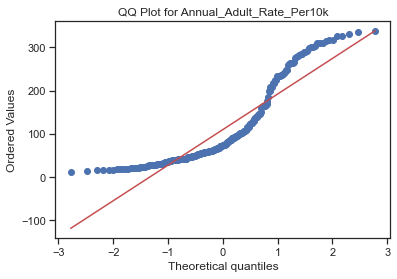

In [22]:
stats.probplot(x=test['Annual_Adult_Rate_Per10k'], dist="norm", plot=plt)
plt.title("QQ Plot for Annual_Adult_Rate_Per10k")
plt.show()

In [23]:
import numpy as np
#asbestos_count	gasses_count	mold_count	dust_count	sewageO_count	sewageL_count	Annual_Adult_Rate_Per10k

In [24]:
test_log = test.copy()
test_log['asbestos_count']= np.log(test_log['asbestos_count'])
test_log['gasses_count']= np.log(test_log['gasses_count'])
test_log['mold_count']= np.log(test_log['mold_count'])
test_log['dust_count']= np.log(test_log['dust_count'])
test_log['ventilation_count']= np.log(test_log['ventilation_count'])
test_log['Annual_Adult_Rate_Per10k']= np.log(test_log['Annual_Adult_Rate_Per10k'])

test_log.rename(columns = {'asbestos_count':'log_asbestos'}, inplace = True)
test_log.rename(columns = {'gasses_count':'log_gasses'}, inplace = True)
test_log.rename(columns = {'mold_count':'log_mold'}, inplace = True)
test_log.rename(columns = {'dust_count':'log_dust'}, inplace = True)
test_log.rename(columns = {'ventilation_count':'log_ventilation'}, inplace = True)
test_log.rename(columns = {'Annual_Adult_Rate_Per10k':'log_Adult_Rate_Per10k'}, inplace = True)
test_log.head()

,Geography,Borough,log_asbestos,log_gasses,log_ventilation,log_mold,log_dust,log_Adult_Rate_Per10k
0,Bayside - Littleneck,Queens,1.609438,1.386294,1.386294,1.098612,NaN,2.890372
1,Bayside - Littleneck,Queens,0.693147,2.079442,2.079442,0.693147,NaN,2.862201
2,Bayside - Littleneck,Queens,1.791759,2.772589,1.098612,0.693147,NaN,3.063391
3,Bayside - Littleneck,Queens,0.000000,2.484907,1.386294,NaN,NaN,2.933857
4,Bayside - Littleneck,Queens,1.609438,3.044522,NaN,NaN,1.386294,2.975530


In [25]:
test_log.head()

,Geography,Borough,log_asbestos,log_gasses,log_ventilation,log_mold,log_dust,log_Adult_Rate_Per10k
0,Bayside - Littleneck,Queens,1.609438,1.386294,1.386294,1.098612,NaN,2.890372
1,Bayside - Littleneck,Queens,0.693147,2.079442,2.079442,0.693147,NaN,2.862201
2,Bayside - Littleneck,Queens,1.791759,2.772589,1.098612,0.693147,NaN,3.063391
3,Bayside - Littleneck,Queens,0.000000,2.484907,1.386294,NaN,NaN,2.933857
4,Bayside - Littleneck,Queens,1.609438,3.044522,NaN,NaN,1.386294,2.975530


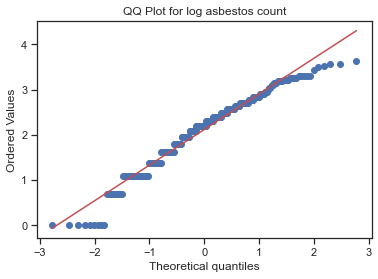

In [26]:
stats.probplot(x=test_log['log_asbestos'], dist="norm", plot=plt)
plt.title("QQ Plot for log asbestos count")
plt.show()

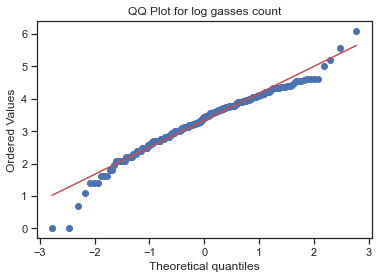

In [27]:
stats.probplot(x=test_log['log_gasses'], dist="norm", plot=plt)
plt.title("QQ Plot for log gasses count")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


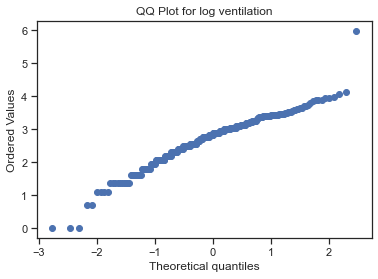

In [28]:
stats.probplot(x=test_log['log_ventilation'], dist="norm", plot=plt)
plt.title("QQ Plot for log ventilation")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


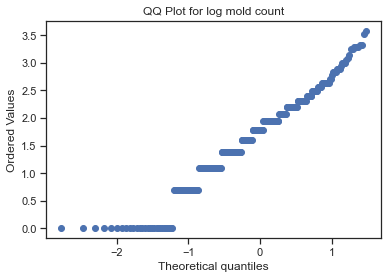

In [29]:
stats.probplot(x=test_log['log_mold'], dist="norm", plot=plt)
plt.title("QQ Plot for log mold count")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


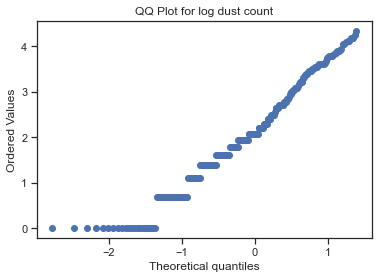

In [30]:
stats.probplot(x=test_log['log_dust'], dist="norm", plot=plt)
plt.title("QQ Plot for log dust count")
plt.show()

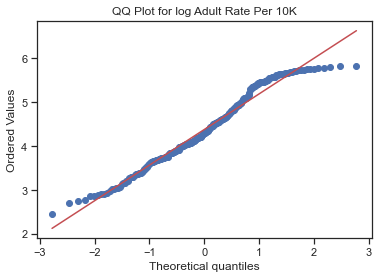

In [31]:
stats.probplot(x=test_log['log_Adult_Rate_Per10k'], dist="norm", plot=plt)
plt.title("QQ Plot for log Adult Rate Per 10K")
plt.show()

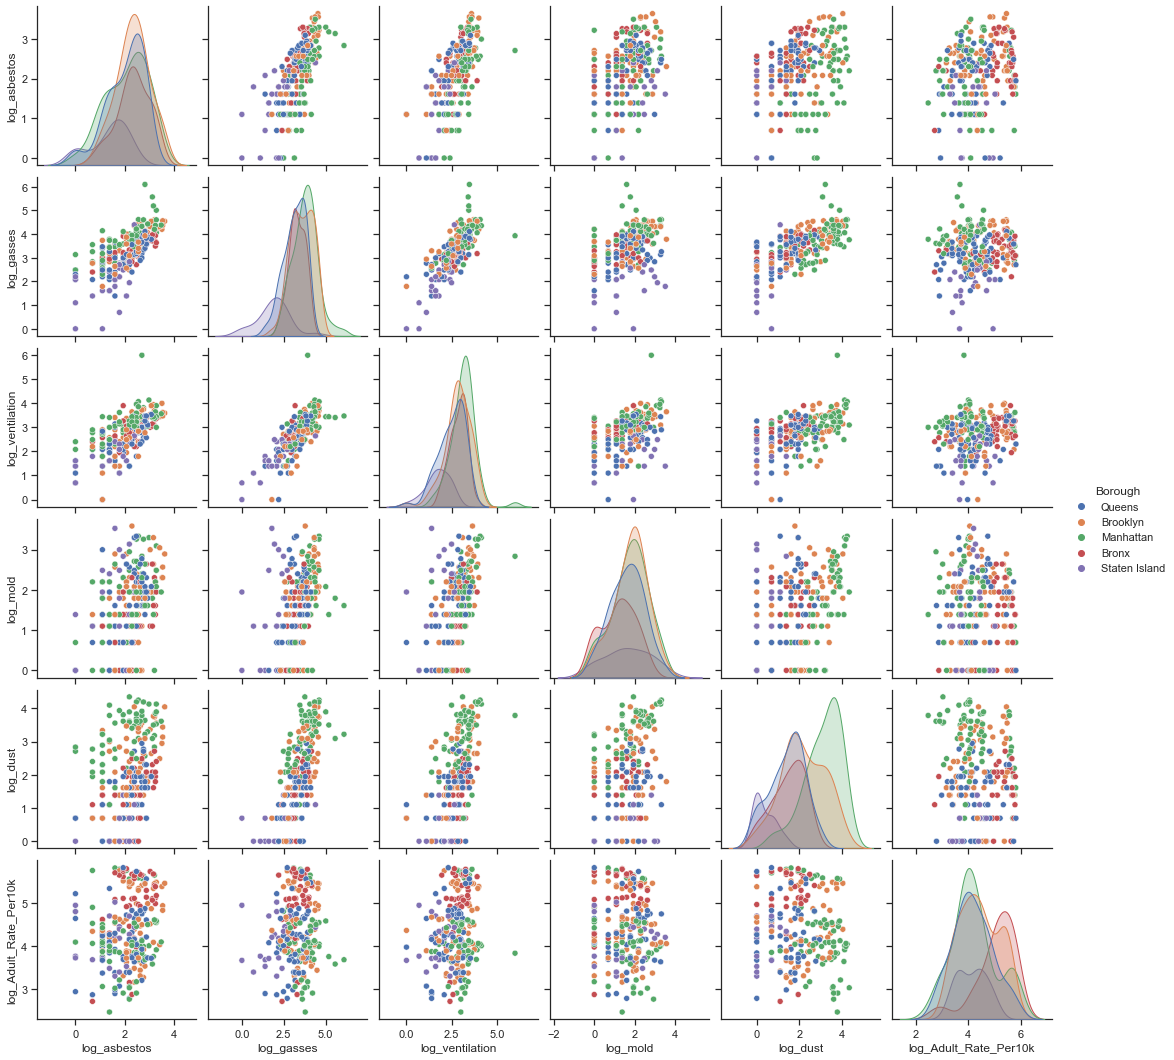

In [32]:
import seaborn as sns
sns.set_theme(style="ticks")

complaints_asthma_plots = sns.pairplot(test_log, hue="Borough")

In [33]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [34]:
test_log.dtypes

Geography                 object
Borough                   object
log_asbestos             float64
log_gasses               float64
log_ventilation          float64
log_mold                 float64
log_dust                 float64
log_Adult_Rate_Per10k    float64
dtype: object

In [35]:
test_log.head()

,Geography,Borough,log_asbestos,log_gasses,log_ventilation,log_mold,log_dust,log_Adult_Rate_Per10k
0,Bayside - Littleneck,Queens,1.609438,1.386294,1.386294,1.098612,NaN,2.890372
1,Bayside - Littleneck,Queens,0.693147,2.079442,2.079442,0.693147,NaN,2.862201
2,Bayside - Littleneck,Queens,1.791759,2.772589,1.098612,0.693147,NaN,3.063391
3,Bayside - Littleneck,Queens,0.000000,2.484907,1.386294,NaN,NaN,2.933857
4,Bayside - Littleneck,Queens,1.609438,3.044522,NaN,NaN,1.386294,2.975530


In [36]:
def standardization(dataset):
    """ 
    Standardization of numeric fields, where all values will have mean of zero 
    and standard deviation of one. (z-score)

    Args:
    dataset: A `Pandas.Dataframe` 
    """
    dtypes = list(zip(dataset.dtypes.index, map(str, dataset.dtypes)))
    # Normalize numeric columns.
    for column, dtype in dtypes:
        if dtype == 'float64':
            dataset[column] -= dataset[column].mean()
            dataset[column] /= dataset[column].std()
    return dataset

In [59]:
test_std = test_log.copy() 

In [38]:
test_std = standardization(test_std)
test_std.head()

,Geography,Borough,log_asbestos,log_gasses,log_ventilation,log_mold,log_dust,log_Adult_Rate_Per10k
0,Bayside - Littleneck,Queens,-0.636480,-2.311973,-1.725263,-0.596209,NaN,-1.826108
1,Bayside - Littleneck,Queens,-1.788726,-1.488702,-0.826299,-1.049330,NaN,-1.860644
2,Bayside - Littleneck,Queens,-0.407209,-0.665430,-2.098367,-1.049330,NaN,-1.613998
3,Bayside - Littleneck,Queens,-2.660366,-1.007119,-1.725263,NaN,NaN,-1.772798
4,Bayside - Littleneck,Queens,-0.636480,-0.342446,NaN,NaN,-0.564718,-1.721710


In [39]:
test_log['Annual_Adult_Rate_Per10k'] = test['Annual_Adult_Rate_Per10k']
test_log['asbestos_count'] = test['asbestos_count']
test_log['gasses_count'] = test['gasses_count']
test_log['mold_count'] = test['mold_count']
test_log['dust_count'] = test['dust_count']
test_log['ventilation_count'] = test['ventilation_count']

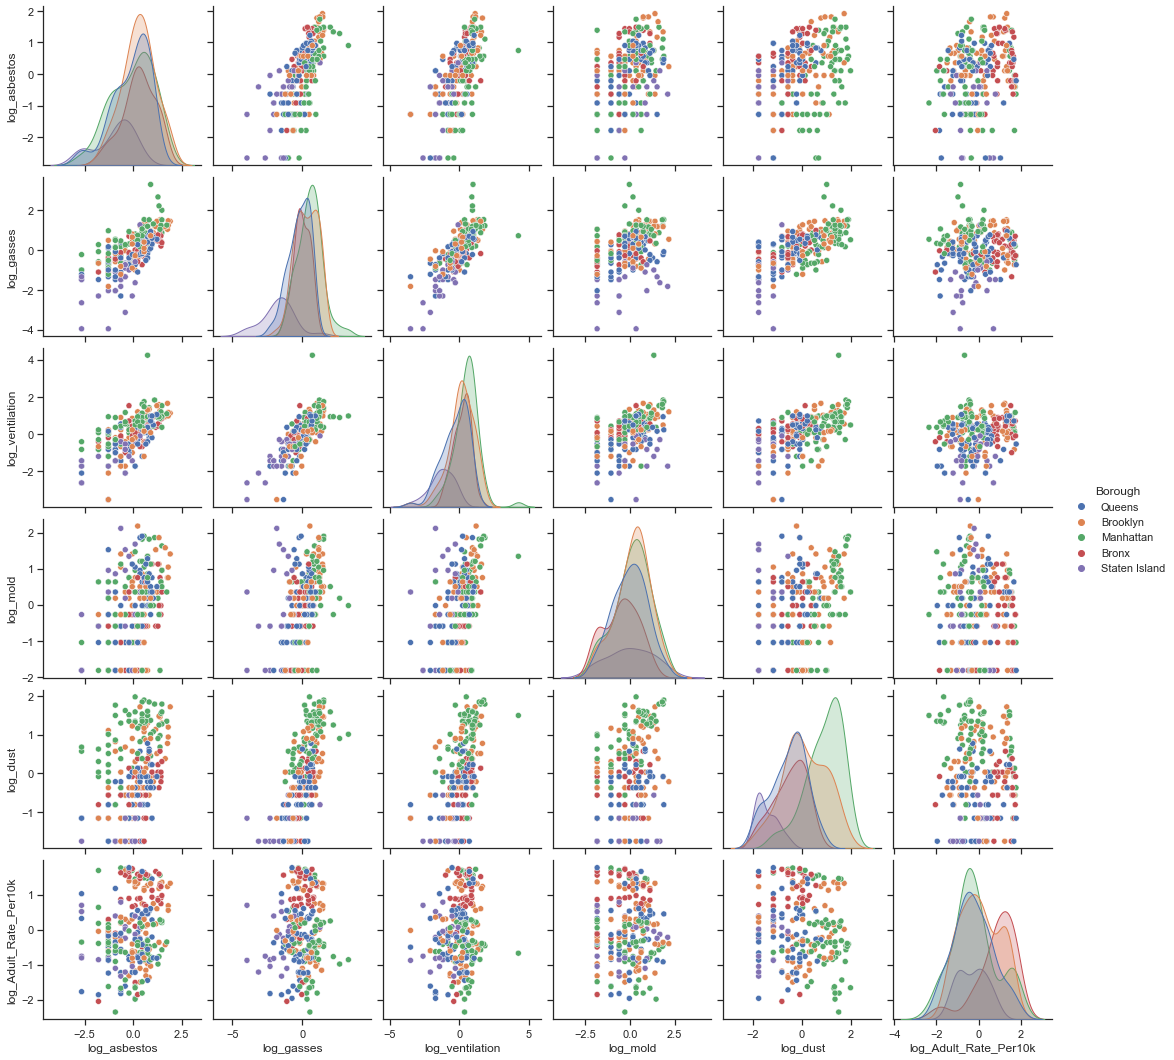

In [41]:
import seaborn as sns
sns.set_theme(style="ticks")

complaints_asthma_plots = sns.pairplot(test_std, hue="Borough")

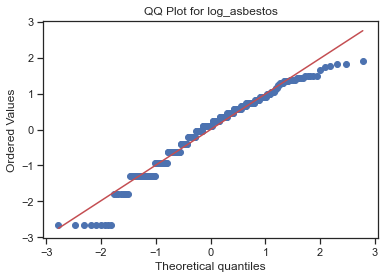

In [42]:
stats.probplot(x=test_std['log_asbestos'].dropna(), dist="norm", plot=plt)
plt.title("QQ Plot for log_asbestos")
plt.show()

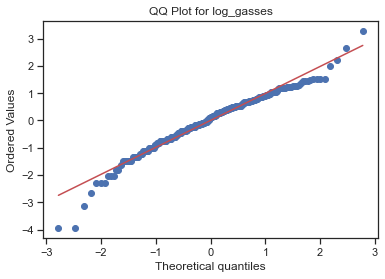

In [43]:
stats.probplot(x=test_std['log_gasses'], dist="norm", plot=plt)
plt.title("QQ Plot for log_gasses")
plt.show()

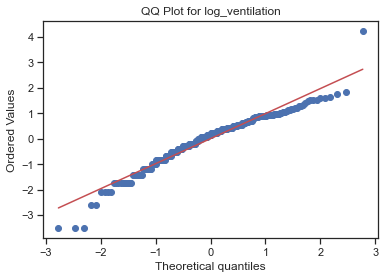

In [44]:
stats.probplot(x=test_std['log_ventilation'].dropna(), dist="norm", plot=plt)
plt.title("QQ Plot for log_ventilation")
plt.show()

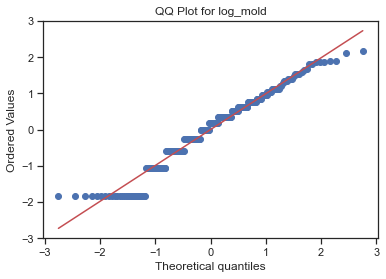

In [45]:
stats.probplot(x=test_std['log_mold'].dropna(), dist="norm", plot=plt)
plt.title("QQ Plot for log_mold")
plt.show()

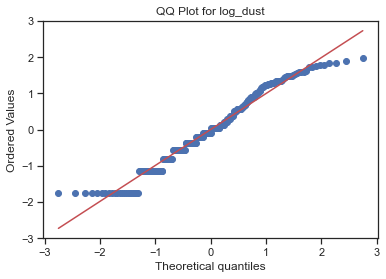

In [46]:
stats.probplot(x=test_std['log_dust'].dropna(), dist="norm", plot=plt)
plt.title("QQ Plot for log_dust")
plt.show()

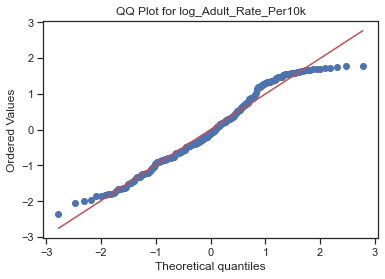

In [47]:
stats.probplot(x=test_std['log_Adult_Rate_Per10k'], dist="norm", plot=plt)
plt.title("QQ Plot for log_Adult_Rate_Per10k")
plt.show()

In [48]:
complaint_nan = test_std['log_dust'].isnull().values.any()
complaint_sum = test_std['log_dust'].isnull().sum()
print(complaint_nan, complaint_sum)

True 20


In [49]:
complaint_nan = test_std['log_mold'].isnull().values.any()
complaint_sum = test_std['log_mold'].isnull().sum()
print(complaint_nan, complaint_sum)

True 17


In [50]:
complaint_nan = test_std['log_ventilation'].isnull().values.any()
complaint_sum = test_std['log_ventilation'].isnull().sum()
print(complaint_nan, complaint_sum)

True 1


In [51]:
complaint_nan = test_std['log_gasses'].isnull().values.any()
complaint_sum = test_std['log_gasses'].isnull().sum()
print(complaint_nan, complaint_sum)

False 0


In [52]:
complaint_nan = test_std['log_asbestos'].isnull().values.any()
complaint_sum = test_std['log_asbestos'].isnull().sum()
print(complaint_nan, complaint_sum)

False 0


In [53]:
complaint_nan = test_std['log_Adult_Rate_Per10k'].isnull().values.any()
complaint_sum = test_std['log_Adult_Rate_Per10k'].isnull().sum()
print(complaint_nan, complaint_sum)

False 0


In [54]:
test_std.shape

(252, 8)

In [55]:
test_log.head()

,Geography,Borough,log_asbestos,log_gasses,log_ventilation,log_mold,log_dust,log_Adult_Rate_Per10k,Annual_Adult_Rate_Per10k,asbestos_count,gasses_count,mold_count,dust_count,ventilation_count
0,Bayside - Littleneck,Queens,1.609438,1.386294,1.386294,1.098612,NaN,2.890372,18.0,5.0,4.0,3.0,NaN,4.0
1,Bayside - Littleneck,Queens,0.693147,2.079442,2.079442,0.693147,NaN,2.862201,17.5,2.0,8.0,2.0,NaN,8.0
2,Bayside - Littleneck,Queens,1.791759,2.772589,1.098612,0.693147,NaN,3.063391,21.4,6.0,16.0,2.0,NaN,3.0
3,Bayside - Littleneck,Queens,0.000000,2.484907,1.386294,NaN,NaN,2.933857,18.8,1.0,12.0,NaN,NaN,4.0
4,Bayside - Littleneck,Queens,1.609438,3.044522,NaN,NaN,1.386294,2.975530,19.6,5.0,21.0,NaN,4.0,NaN


In [58]:
test_std.head()

,Geography,Borough,log_asbestos,log_gasses,log_ventilation,log_mold,log_dust,log_Adult_Rate_Per10k
0,Bayside - Littleneck,Queens,-0.636480,-2.311973,-1.725263,-0.596209,NaN,-1.826108
1,Bayside - Littleneck,Queens,-1.788726,-1.488702,-0.826299,-1.049330,NaN,-1.860644
2,Bayside - Littleneck,Queens,-0.407209,-0.665430,-2.098367,-1.049330,NaN,-1.613998
3,Bayside - Littleneck,Queens,-2.660366,-1.007119,-1.725263,NaN,NaN,-1.772798
4,Bayside - Littleneck,Queens,-0.636480,-0.342446,NaN,NaN,-0.564718,-1.721710


In [ ]:
test_std2 = test_std[['Borough' ,'log_ventilation', 'log_dust', 'log_gasses','asbestos_count', 'mold_count']]

In [ ]:
test_std2.head()

In [60]:
formula1 = 'Annual_Adult_Rate_Per10k ~ Borough + log_ventilation + log_dust + log_gasses  + asbestos_count+ mold_count'
log_level_model1 = sm.ols(formula=formula1, data=test_std).fit()
log_level_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Annual_Adult_Rate_Per10k   R-squared:                       0.301
Model:                                  OLS   Adj. R-squared:                  0.270
Method:                       Least Squares   F-statistic:                     9.938
Date:                      Thu, 12 Aug 2021   Prob (F-statistic):           1.20e-12
Time:                              21:55:56   Log-Likelihood:                -1254.3
No. Observations:                       218   AIC:                             2529.
Df Residuals:                           208   BIC:                             2562.
Df Model:                                 9                                         
Covariance Type:                  nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  179.2710     35.625      5.032      0.000     109.039     249.503
Borough[T.Brooklyn]        -69.8627     17.727     -3.941      0.000    -104.810     -34.915
Borough[T.Manhattan]       -65.5093     20.557     -3.187      0.002    -106.035     -24.983
Borough[T.Queens]          -87.3182     18.316     -4.767      0.000    -123.427     -51.210
Borough[T.Staten Island]  -125.5467     29.410     -4.269      0.000    -183.527     -67.566
log_ventilation             43.1315     12.499      3.451      0.001      18.490      67.773
log_dust                   -15.2368      7.435     -2.049      0.042     -29.895      -0.579
log_gasses                 -29.8938     13.187     -2.267      0.024     -55.891      -3.896
asbestos_count               2.7823      0.995      2.796      0.006       0.820       4.744
mold_count                  -2.6660      0.989     -2.696      0.008      -4.616      -0.716
==============================================================================
Omnibus:                       20.243   Durbin-Watson:                   0.641
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.269
Skew:                           0.791   Prob(JB):                     8.86e-06
Kurtosis:                       3.248   Cond. No.                         139.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
formula1 = 'log_Adult_Rate_Per10k ~ Borough + log_ventilation + log_dust + log_gasses  + log_asbestos+ log_mold'
log_level_model1 = smf.ols(formula=formula1, data=test_log).fit()
log_level_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     log_Adult_Rate_Per10k   R-squared:                       0.245
Model:                               OLS   Adj. R-squared:                  0.212
Method:                    Least Squares   F-statistic:                     7.506
Date:                   Thu, 12 Aug 2021   Prob (F-statistic):           1.71e-09
Time:                           21:56:00   Log-Likelihood:                -232.71
No. Observations:                    218   AIC:                             485.4
Df Residuals:                        208   BIC:                             519.3
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    4.7032      0.308     15.258      0.000       4.096       5.311
Borough[T.Brooklyn]         -0.5990      0.164     -3.658      0.000      -0.922      -0.276
Borough[T.Manhattan]        -0.6717      0.193     -3.489      0.001      -1.051      -0.292
Borough[T.Queens]           -0.7665      0.170     -4.513      0.000      -1.101      -0.432
Borough[T.Staten Island]    -1.0720      0.273     -3.921      0.000      -1.611      -0.533
log_ventilation              0.2438      0.116      2.096      0.037       0.014       0.473
log_dust                    -0.1352      0.068     -1.980      0.049      -0.270      -0.001
log_gasses                  -0.1559      0.122     -1.276      0.203      -0.397       0.085
log_asbestos                 0.2300      0.102      2.244      0.026       0.028       0.432
log_mold                    -0.0455      0.068     -0.665      0.507      -0.180       0.089
==============================================================================
Omnibus:                        0.779   Durbin-Watson:                   0.646
Prob(Omnibus):                  0.678   Jarque-Bera (JB):                0.878
Skew:                          -0.072   Prob(JB):                        0.645
Kurtosis:                       2.724   Cond. No.                         48.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
formula1 = 'log_Adult_Rate_Per10k ~ log_gasses'
log_level_model1 = smf.ols(formula=formula1, data=test_log).fit()
log_level_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     log_Adult_Rate_Per10k   R-squared:                       0.006
Model:                               OLS   Adj. R-squared:                  0.002
Method:                    Least Squares   F-statistic:                     1.613
Date:                   Thu, 12 Aug 2021   Prob (F-statistic):              0.205
Time:                           21:56:05   Log-Likelihood:                -304.93
No. Observations:                    252   AIC:                             613.9
Df Residuals:                        250   BIC:                             620.9
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1214      0.210     19.632      0.000       3.708       4.535
log_gasses     0.0776      0.061      1.270      0.205      -0.043       0.198
==============================================================================
Omnibus:                       22.751   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.679
Skew:                           0.048   Prob(JB):                       0.0215
Kurtosis:                       2.150   Cond. No.                         15.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
formula1 = 'log_Adult_Rate_Per10k ~ log_dust'
log_level_model1 = smf.ols(formula=formula1, data=test_log).fit()
log_level_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     log_Adult_Rate_Per10k   R-squared:                       0.015
Model:                               OLS   Adj. R-squared:                  0.010
Method:                    Least Squares   F-statistic:                     3.395
Date:                   Thu, 12 Aug 2021   Prob (F-statistic):             0.0667
Time:                           21:56:07   Log-Likelihood:                -279.00
No. Observations:                    232   AIC:                             562.0
Df Residuals:                        230   BIC:                             568.9
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5903      0.107     42.738      0.000       4.379       4.802
log_dust      -0.0841      0.046     -1.842      0.067      -0.174       0.006
==============================================================================
Omnibus:                       22.229   Durbin-Watson:                   0.425
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.294
Skew:                           0.030   Prob(JB):                       0.0261
Kurtosis:                       2.133   Cond. No.                         5.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
formula1 = 'log_Adult_Rate_Per10k ~ log_ventilation'
log_level_model1 = smf.ols(formula=formula1, data=test_log).fit()
log_level_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     log_Adult_Rate_Per10k   R-squared:                       0.034
Model:                               OLS   Adj. R-squared:                  0.030
Method:                    Least Squares   F-statistic:                     8.760
Date:                   Thu, 12 Aug 2021   Prob (F-statistic):            0.00338
Time:                           21:56:07   Log-Likelihood:                -299.19
No. Observations:                    251   AIC:                             602.4
Df Residuals:                        249   BIC:                             609.4
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.8578      0.185     20.818      0.000       3.493       4.223
log_ventilation     0.1943      0.066      2.960      0.003       0.065       0.324
==============================================================================
Omnibus:                       22.467   Durbin-Watson:                   0.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.555
Skew:                          -0.022   Prob(JB):                       0.0229
Kurtosis:                       2.151   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
formula1 = 'log_Adult_Rate_Per10k ~ log_ventilation + log_asbestos + log_dust'
log_level_model1 = smf.ols(formula=formula1, data=test_log).fit()
log_level_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     log_Adult_Rate_Per10k   R-squared:                       0.106
Model:                               OLS   Adj. R-squared:                  0.094
Method:                    Least Squares   F-statistic:                     8.942
Date:                   Thu, 12 Aug 2021   Prob (F-statistic):           1.27e-05
Time:                           21:56:08   Log-Likelihood:                -265.50
No. Observations:                    231   AIC:                             539.0
Df Residuals:                        227   BIC:                             552.8
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.8063      0.204     18.690      0.000       3.405       4.208
log_ventilation     0.2079      0.097      2.146      0.033       0.017       0.399
log_asbestos        0.2086      0.084      2.469      0.014       0.042       0.375
log_dust           -0.2051      0.052     -3.960      0.000      -0.307      -0.103
==============================================================================
Omnibus:                       15.264   Durbin-Watson:                   0.532
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.981
Skew:                          -0.039   Prob(JB):                       0.0503
Kurtosis:                       2.216   Cond. No.                         18.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""